In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
warnings.filterwarnings("ignore")

In [116]:
d= pd.read_csv(r'D:\internfolder\loanapplication.csv')
d

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [117]:
d.shape

(614, 13)

In [118]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

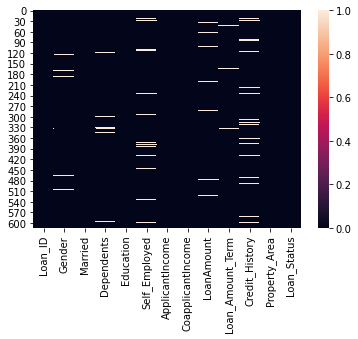

In [119]:
sns.heatmap(d.isnull())

In [120]:
d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [121]:
d=d.dropna()

<AxesSubplot:>

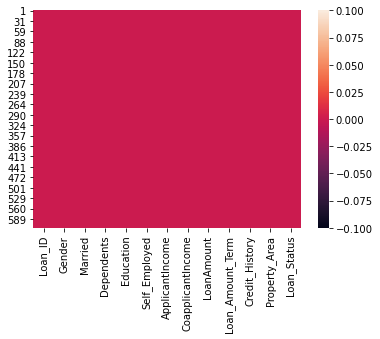

In [122]:
sns.heatmap(d.isnull())

# visualization

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

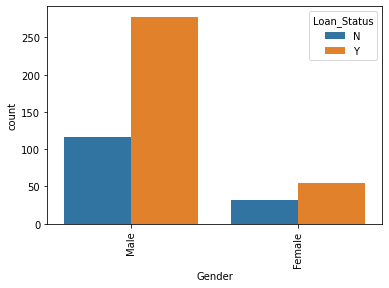

In [123]:
sns.countplot(x='Gender',hue= "Loan_Status",data=d)

plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

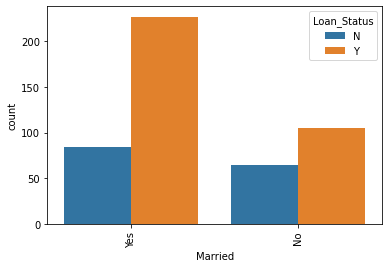

In [124]:
sns.countplot(x='Married',hue= "Loan_Status",data=d)

plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

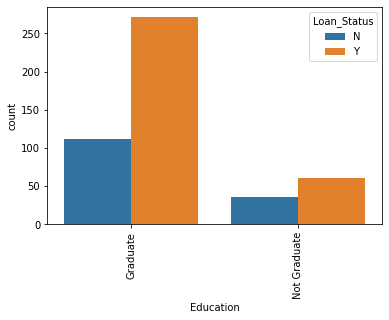

In [125]:
sns.countplot(x='Education',hue= "Loan_Status",data=d)

plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Rural'), Text(1, 0, 'Urban'), Text(2, 0, 'Semiurban')])

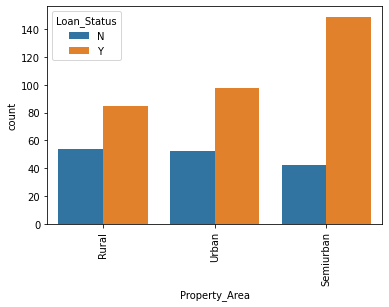

In [126]:
sns.countplot(x='Property_Area',hue= "Loan_Status",data=d)

plt.xticks(rotation=90)

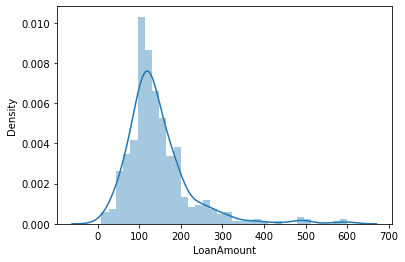

In [127]:
sns.distplot(d["LoanAmount"])
plt.show()

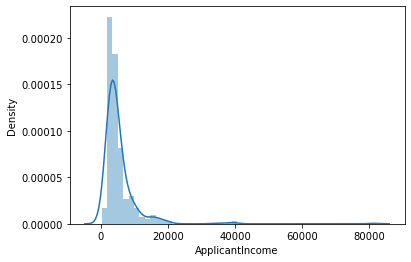

In [128]:
sns.distplot(d["ApplicantIncome"])
plt.show()

# encoding the data

In [129]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [131]:
for i in d.columns:
    if d[i].dtypes=="object":
        d[i]=enc.fit_transform(d[i].values.reshape(-1,1))
d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,2.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,3.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,4.0,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0


In [133]:
d=d.drop(["Loan_ID"],axis=1)

In [134]:
d.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0


In [135]:
d.shape

(480, 12)

In [137]:
d.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [138]:
d.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.000318,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.026651,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


<AxesSubplot:>

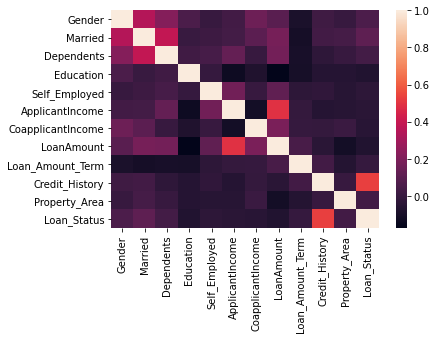

In [139]:
sns.heatmap(d.corr())

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>],
       [<AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>

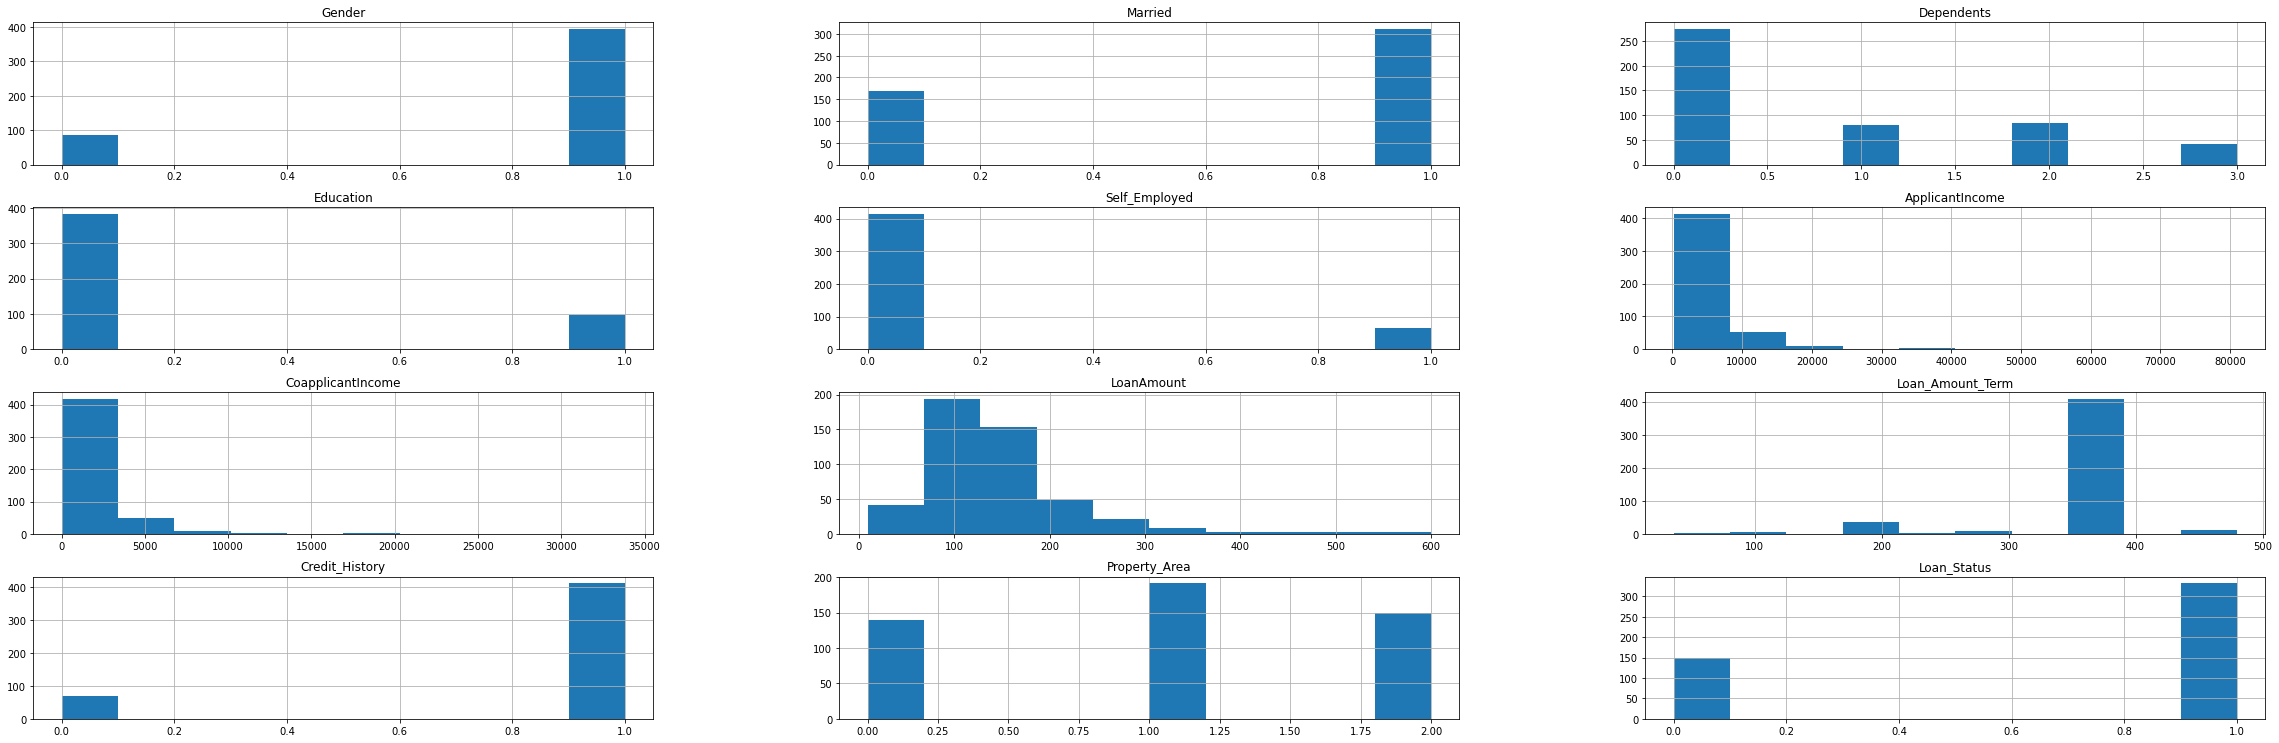

In [148]:
d.hist(figsize=(40,40), layout=(12,3), sharex=False)

# plotting and checking outliers

Gender                  AxesSubplot(0.125,0.826831;0.168478x0.053169)
Married              AxesSubplot(0.327174,0.826831;0.168478x0.053169)
Dependents           AxesSubplot(0.529348,0.826831;0.168478x0.053169)
Education            AxesSubplot(0.731522,0.826831;0.168478x0.053169)
Self_Employed           AxesSubplot(0.125,0.763028;0.168478x0.053169)
ApplicantIncome      AxesSubplot(0.327174,0.763028;0.168478x0.053169)
CoapplicantIncome    AxesSubplot(0.529348,0.763028;0.168478x0.053169)
LoanAmount           AxesSubplot(0.731522,0.763028;0.168478x0.053169)
Loan_Amount_Term        AxesSubplot(0.125,0.699225;0.168478x0.053169)
Credit_History       AxesSubplot(0.327174,0.699225;0.168478x0.053169)
Property_Area        AxesSubplot(0.529348,0.699225;0.168478x0.053169)
Loan_Status          AxesSubplot(0.731522,0.699225;0.168478x0.053169)
dtype: object

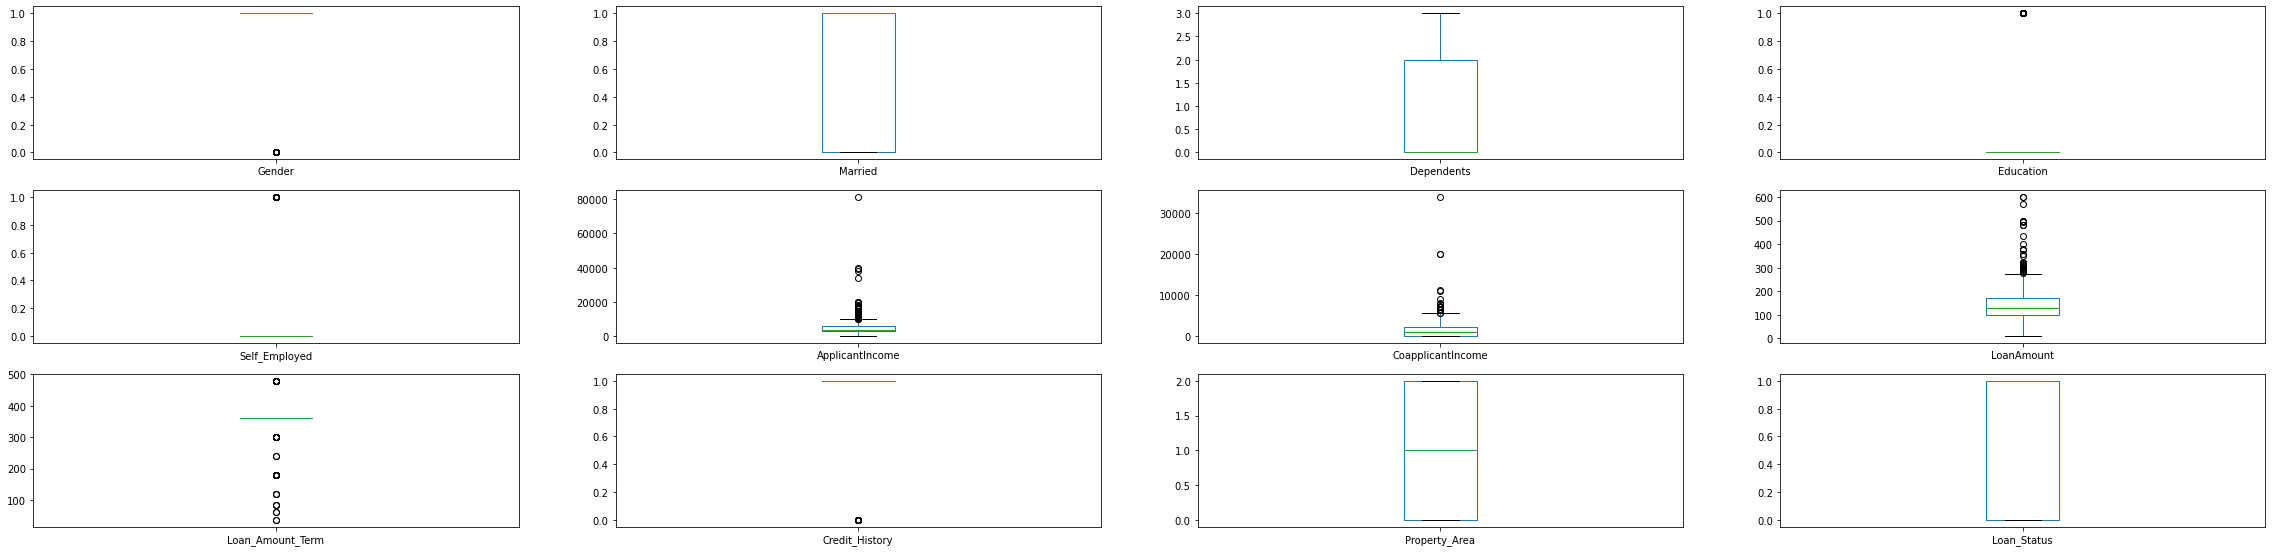

In [141]:
d.plot(kind="box",subplots=True,layout=(12,4),figsize=(40,40))

In [149]:
import numpy as np
import scipy
from scipy.stats import zscore
z=np.abs(zscore(d))
z

array([[0.46719815, 0.73716237, 0.21859918, ..., 0.41319694, 1.31886834,
        1.49774605],
       [0.46719815, 0.73716237, 0.76203265, ..., 0.41319694, 1.25977445,
        0.66766993],
       [0.46719815, 0.73716237, 0.76203265, ..., 0.41319694, 1.25977445,
        0.66766993],
       ...,
       [0.46719815, 0.73716237, 0.21859918, ..., 0.41319694, 1.25977445,
        0.66766993],
       [0.46719815, 0.73716237, 1.19923101, ..., 0.41319694, 1.25977445,
        0.66766993],
       [2.14041943, 1.35655324, 0.76203265, ..., 2.42015348, 0.02954695,
        1.49774605]])

In [150]:
threshold=3
print(np.where(z>3))

(array([  8,  12,  54,  75,  98, 120, 120, 137, 137, 142, 144, 187, 205,
       220, 244, 286, 312, 319, 326, 347, 380, 386, 409, 410, 426, 438,
       450, 454, 457, 471], dtype=int64), array([6, 8, 8, 8, 8, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 7, 6, 5, 6, 5, 7, 8,
       7, 7, 8, 7, 8, 6, 8, 7], dtype=int64))


In [151]:
d2=d[(z<3).all(axis=1)]
d2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [152]:
d.shape

(480, 12)

In [153]:
d2.shape

(452, 12)

# dividing data in features and vectors-

In [155]:
x=d2.drop(['Loan_Status'],axis=1)
y=d2['Loan_Status']

# checking skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

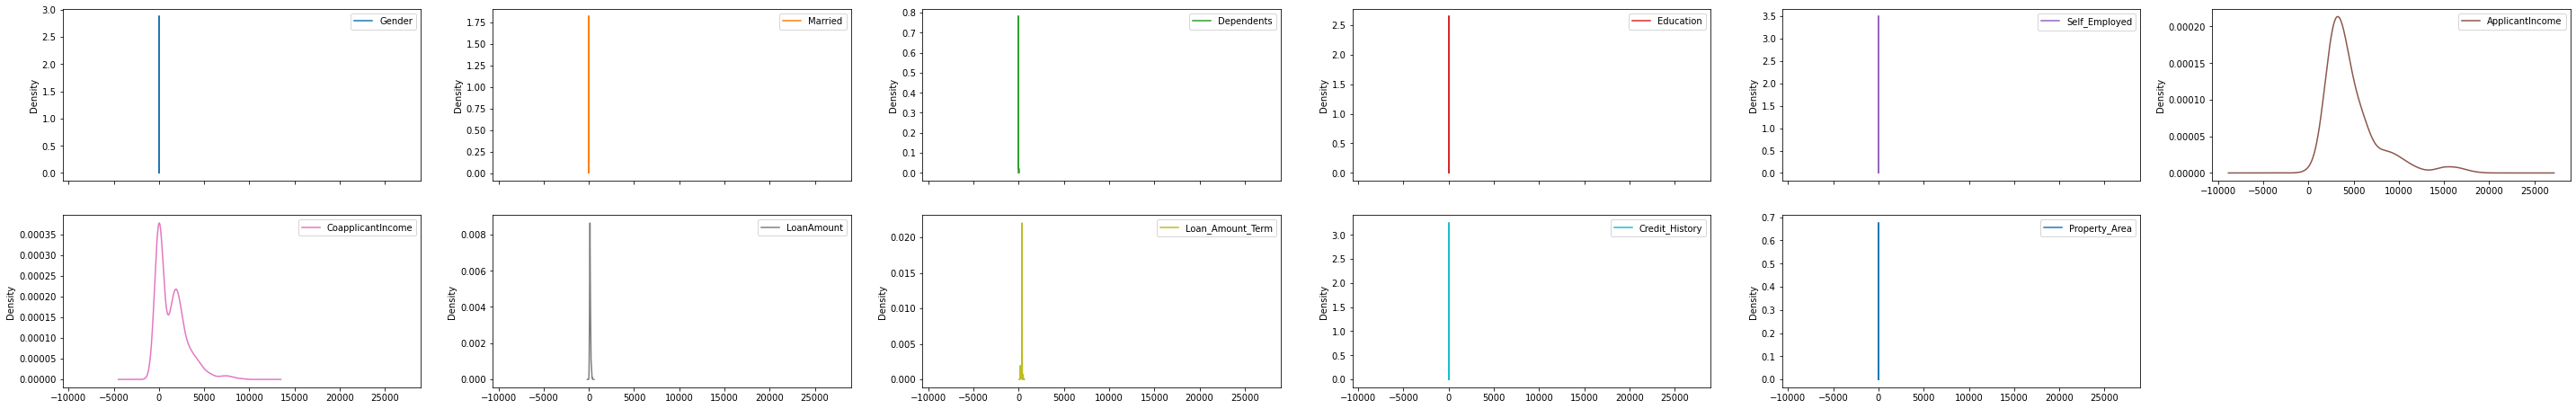

In [156]:
x.plot(kind="kde",subplots=True,layout=(12,6),figsize=(50,50))

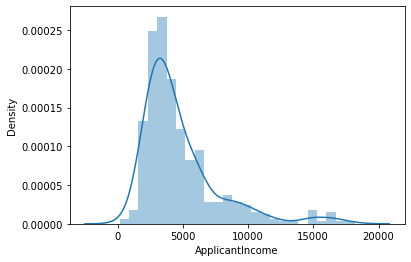

In [157]:
sns.distplot(d2.ApplicantIncome)
plt.show()

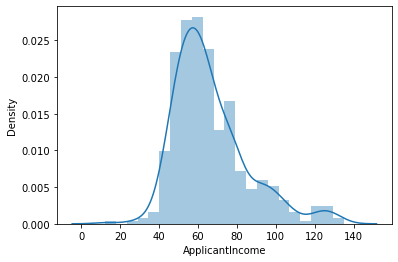

In [158]:
d2["ApplicantIncome"]=np.sqrt(d2.ApplicantIncome)
sns.distplot(d2['ApplicantIncome'])
plt.show()

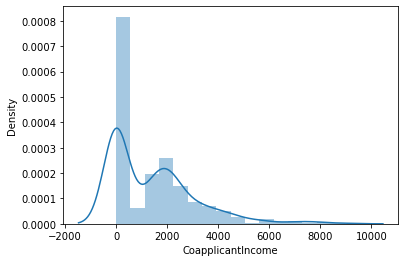

In [159]:
sns.distplot(d2.CoapplicantIncome)
plt.show()

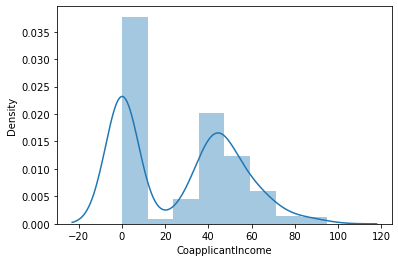

In [160]:
d2["CoapplicantIncome"]=np.sqrt(d2.CoapplicantIncome)
sns.distplot(d2['CoapplicantIncome'])
plt.show()

# Testing on various models

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
mnb=MultinomialNB()
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()

In [163]:
model=[lg,dtc,mnb,svc]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of",m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is
0.8333333333333334
[[ 19  24]
 [  1 106]]
              precision    recall  f1-score   support

         0.0       0.95      0.44      0.60        43
         1.0       0.82      0.99      0.89       107

    accuracy                           0.83       150
   macro avg       0.88      0.72      0.75       150
weighted avg       0.85      0.83      0.81       150



Accuracy score of DecisionTreeClassifier() is
0.6933333333333334
[[25 18]
 [28 79]]
              precision    recall  f1-score   support

         0.0       0.47      0.58      0.52        43
         1.0       0.81      0.74      0.77       107

    accuracy                           0.69       150
   macro avg       0.64      0.66      0.65       150
weighted avg       0.72      0.69      0.70       150



Accuracy score of MultinomialNB() is
0.4066666666666667
[[23 20]
 [69 38]]
              precision    recall  f1-score   support

         0.0       0.25      0.53      0.34 

In [164]:
#predicting the value
pred=lg.predict(x_test)
print("Loan_Status",pred)

Loan_Status [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1.]


In [166]:
dfr1=pd.DataFrame({"Actual Loan_Status":y_test,"Predicted Loan_Status":pred})
dfr1

,Actual Loan_Status,Predicted Loan_Status
404,0.0,1.0
54,0.0,0.0
454,1.0,1.0
448,0.0,0.0
208,1.0,1.0
...,...,...
471,0.0,0.0
210,0.0,1.0
558,1.0,1.0
545,1.0,1.0


# AUC ans ROC curve

In [167]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [168]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.65638908, 0.07508832, 0.7909061 , 0.23791607, 0.71643241,
       0.69013166, 0.8919717 , 0.60722594, 0.8722116 , 0.82760608,
       0.765051  , 0.71467692, 0.71325819, 0.64132311, 0.65661137,
       0.80515206, 0.10059685, 0.74003505, 0.17178583, 0.65951638,
       0.76203209, 0.05710745, 0.81860976, 0.7895477 , 0.78562989,
       0.85136328, 0.79710813, 0.80383143, 0.79134108, 0.77607398,
       0.76060694, 0.65987791, 0.10530386, 0.82379538, 0.87502994,
       0.88770226, 0.94253348, 0.8392281 , 0.09962526, 0.79333863,
       0.8102732 , 0.77993139, 0.74456751, 0.86420264, 0.74610355,
       0.81363514, 0.8119629 , 0.85982681, 0.47376173, 0.76593486,
       0.78427346, 0.14901785, 0.78471164, 0.85990521, 0.83591506,
       0.90228608, 0.66891657, 0.56281032, 0.62461806, 0.79053247,
       0.80742304, 0.87481784, 0.78167874, 0.79038901, 0.6986563 ,
       0.7676666 , 0.78890716, 0.76898914, 0.83055069, 0.81018287,
       0.17235094, 0.69817855, 0.76389488, 0.70961881, 0.69423

In [169]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [170]:
#false positive rate
fpr

array([0.        , 0.        , 0.02325581, 0.02325581, 0.04651163,
       0.04651163, 0.06976744, 0.06976744, 0.11627907, 0.11627907,
       0.13953488, 0.13953488, 0.1627907 , 0.1627907 , 0.18604651,
       0.18604651, 0.20930233, 0.20930233, 0.23255814, 0.23255814,
       0.25581395, 0.25581395, 0.30232558, 0.30232558, 0.3255814 ,
       0.3255814 , 0.37209302, 0.37209302, 0.39534884, 0.39534884,
       0.41860465, 0.41860465, 0.46511628, 0.46511628, 0.48837209,
       0.48837209, 0.51162791, 0.51162791, 0.53488372, 0.53488372,
       0.76744186, 0.76744186, 1.        ])

In [171]:
#true positive rate
tpr

array([0.        , 0.00934579, 0.00934579, 0.07476636, 0.07476636,
       0.08411215, 0.08411215, 0.11214953, 0.11214953, 0.13084112,
       0.13084112, 0.1682243 , 0.1682243 , 0.17757009, 0.17757009,
       0.19626168, 0.19626168, 0.26168224, 0.26168224, 0.42990654,
       0.42990654, 0.48598131, 0.48598131, 0.53271028, 0.53271028,
       0.70093458, 0.70093458, 0.74766355, 0.74766355, 0.81308411,
       0.81308411, 0.85046729, 0.85046729, 0.88785047, 0.88785047,
       0.92523364, 0.92523364, 0.97196262, 0.97196262, 0.99065421,
       0.99065421, 1.        , 1.        ])

In [172]:
threshold

array([1.94253348, 0.94253348, 0.93682423, 0.87502994, 0.87481784,
       0.87400208, 0.8722116 , 0.85990521, 0.85633393, 0.85136328,
       0.85014022, 0.83591506, 0.83383937, 0.83230248, 0.83055069,
       0.82486534, 0.82379538, 0.8119629 , 0.8102732 , 0.7909061 ,
       0.79053247, 0.78562989, 0.78471164, 0.77993139, 0.77813002,
       0.74874284, 0.74610355, 0.74259736, 0.74140156, 0.71467692,
       0.71325819, 0.69817855, 0.69423219, 0.66757288, 0.66288201,
       0.65661137, 0.65638908, 0.60722594, 0.60614479, 0.56253403,
       0.17235094, 0.17178583, 0.05710745])

<function matplotlib.pyplot.show(close=None, block=None)>

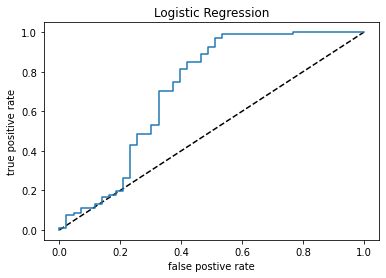

In [173]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("false postive rate")
plt.ylabel("true positive rate")
plt.title("Logistic Regression")
plt.show

In [174]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.7162573353618777
